In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from dynamic_bernoulli_embeddings.analysis import DynamicEmbeddingAnalysis

In [3]:
token_to_id = pickle.load(open("./save_korean2/kr_word2id.pkl", "rb"))
embeddings = pickle.load(open("./save_korean2/emb_mat.pkl", 'rb'))
emb = DynamicEmbeddingAnalysis(embeddings, token_to_id)
loss_curves = pd.read_csv("./save_korean2/loss_history.csv")

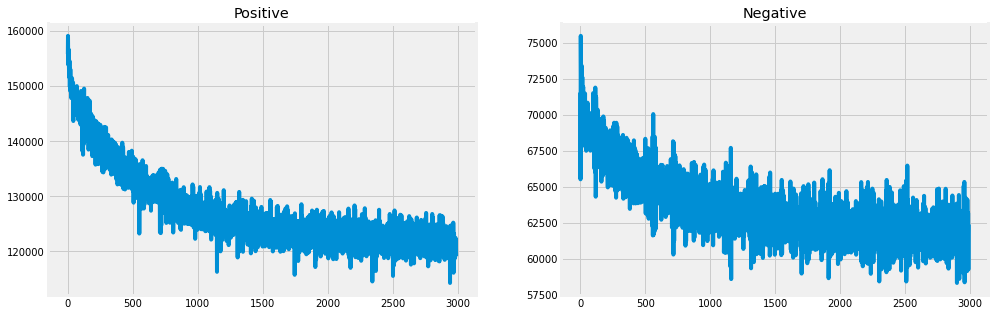

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
(loss_curves.l_pos * -1).plot(title="Positive", ax=ax[0])
(loss_curves.l_neg * -1).plot(title="Negative", ax=ax[1])

In [5]:
pd.DataFrame(emb.absolute_drift(20), columns=["Drift", "Term"])[["Term", "Drift"]]

,Term,Drift
0,!,0.872070
1,".""",0.791099
2,▁고문,0.761559
3,▁해당,0.750853
4,▁심상,0.747203
5,▁〈,0.739758
6,▁특진관,0.730532
7,",",0.729546
8,▁아뢰었다,0.722719
9,▁【,0.721731


In [6]:
pd.DataFrame([(i+1, term, change) for i, term, change in emb.change_points(10)], columns=["Year", "Term", "Change"])

,Year,Term,Change
0,7,등,0.584825
1,6,등,0.545503
2,14,▁말,0.504469
3,7,▁이름을,0.502765
4,6,▁이름을,0.438863
5,7,이고,0.433482
6,26,",",0.413227
7,7,▁족,0.412033
8,7,▁아들,0.399843
9,6,이고,0.393682


In [119]:
v = '▁쌀' # 왜 = '倭'
# v = '일본'
over_time = {}
for i in range(0, 27):
    col = str(i+1)
    over_time[col] = emb.neighborhood(v, i,20, sign=False)
over_time = pd.DataFrame(over_time)

In [120]:
over_time.transpose().iloc[[0, 9, 18, 26]]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,▁무명,▁잡곡,▁미두,▁목면,▁소금,▁곡식,쌀,▁황두,▁면포,▁미곡,▁보리,석씩,▁생선,▁관곽,▁목화,▁인삼,▁포목,▁부의로,▁전죽,▁군자창
10,▁무명,▁목면,▁미두,쌀,▁면포,▁잡곡,▁황두,▁곡식,▁소금,▁미곡,▁생선,▁호초,▁목화,▁포목,석씩,▁군자창,▁정포,▁보리,▁부의로,▁쌀이
19,▁무명,▁목면,▁미곡,▁곡식,▁소금,▁잡곡,▁면포,▁포목,쌀,▁생선,▁전죽,▁미두,▁황두,▁인삼,▁양식,▁곡물,▁동철,▁쌀이,▁군자창,▁수량
27,▁무명,▁목면,▁소금,▁잡곡,▁미곡,▁인삼,▁면포,▁생선,▁포목,쌀,▁황두,▁곡식,▁전죽,▁양식,▁값,▁마장,▁벼,▁유둔,▁동철,▁쌀이


In [121]:
v = '쌀'
over_time = {}
for i in range(0, 27):
    col = str(i+1)
    over_time[col] = emb.neighborhood(v, i, 12, sign=False)
over_time = pd.DataFrame(over_time)

In [122]:
over_time.transpose().iloc[[0, 9, 18, 26]]

,0,1,2,3,4,5,6,7,8,9,10,11
1,곡식,▁무명,▁마른,▁쌀,석씩,벼,나무와,보리,▁목면,나무,닭,▁목화
10,곡식,▁쌀,▁무명,벼,석씩,나무와,▁목면,보리,나무,갓,▁목화,닭
19,곡식,▁쌀,▁무명,벼,값,보리,그릇,석씩,▁목면,면포,갓,나무와
27,곡식,▁무명,▁쌀,값,석씩,벼,▁값으로,보리,면포,▁목면,그릇,목면
